# Naive Bayesian Models

In the second section, you became familiar with Bayesian models. At the end of that section, it was mentioned that the number of predictor variables can be more than one. In this section, we intend to examine this case of problems. We will present a problem that has two predictor variables.

Example) Consider the conditions of the question from the second section. We intend to create a stronger Bayesian model by adding a new criterion based on the number of times a student participates in cheating. To simplify, we will consider the boundary found in the previous section for participation (0.56) and will not change it. Next, we will find the best threshold for the number of cheats in a way that, by applying this threshold to convert the information into binary form, we achieve the best efficiency.

In [1]:
follow_rate = c(
  0.259, 0.944, 0.676, 0.148, 0.546, 0.556, 0.833, 0.87 , 0.713, 0.704, 0.019,
  0.833, 0.778, 0.667, 0.944, 0.0  , 0.796, 0.935, 0.222, 0.806, 0.704, 0.769,
  0.731, 0.602, 0.704, 0.398, 0.815, 0.528, 0.602, 0.713, 0.769, 0.935, 0.824,
  0.398, 0.898, 0.37 , 0.537, 0.944, 0.778, 0.407, 0.954, 0.87 , 0.491, 0.824,
  0.491, 0.713, 0.935, 0.38 , 0.037, 0.963, 0.63 , 0.574, 0.907, 0.0  , 0.63 ,
  0.796, 0.917, 0.481, 0.824, 0.972, 0.954, 0.861, 0.713, 0.315, 0.963, 0.935,
  0.324, 0.944, 0.778, 0.861, 0.509
)
final_grade = c(
  0.0  , 54.0 , 46.5 , 0.0  , 37.0 , 9.0  , 56.5 , 42.3 , 70.5 , 76.5 , 0.0  ,
  37.5 , 57.5 , 62.0 , 87.5 , 0.0  , 94.5 , 75.6 , 14.5 , 41.1 , 91.5 , 90.5 ,
  73.0 , 68.0 , 52.0 , 19.5 , 65.5 , 51.0 , 64.0 , 39.0 , 79.3 , 66.0 , 69.5 ,
  33.8 , 44.5 , 51.9 , 38.8 , 52.2 , 45.0 , 66.5 , 64.5 , 56.7 , 0.0  , 87.0 ,
  27.5 , 63.7 , 49.0 , 16.2 , 0.0  , 84.2 , 53.5 , 80.5 , 37.5 , 0.0  , 87.5 ,
  56.0 , 74.5 , 85.5 , 70.0 , 88.5 , 69.5 , 83.8 , 61.5 , 32.0 , 65.5 , 78.0 ,
  47.5 , 73.0 , 79.2 , 76.0 , 0.0
)
fraud_count = c(
  0 , 0 , 0 , 0 , 0 , 0 , 10, 0 , 39, 56, 0 ,
  0 , 11, 2 , 6 , 0 , 31, 0 , 0 , 0 , 33, 20,
  35, 12, 0 , 5 , 2 , 0 , 54, 0 , 3 , 0 , 19,
  6 , 0 , 0 , 10, 0 , 0 , 0 , 0 , 20, 44, 21,
  0 , 28, 0 , 0 , 0 , 3 , 0 , 46, 0 , 0 , 45,
  0 , 0 , 61, 6 , 3 , 2 , 0 , 23, 12, 0 , 0 ,
  0 , 0 , 25, 15, 0
)
history = data.frame(follow_rate, final_grade, fraud_count)
head(history)

,follow_rate,final_grade,fraud_count
,<dbl>,<dbl>,<dbl>
1,0.259,0.0,0
2,0.944,54.0,0
3,0.676,46.5,0
4,0.148,0.0,0
5,0.546,37.0,0
6,0.556,9.0,0


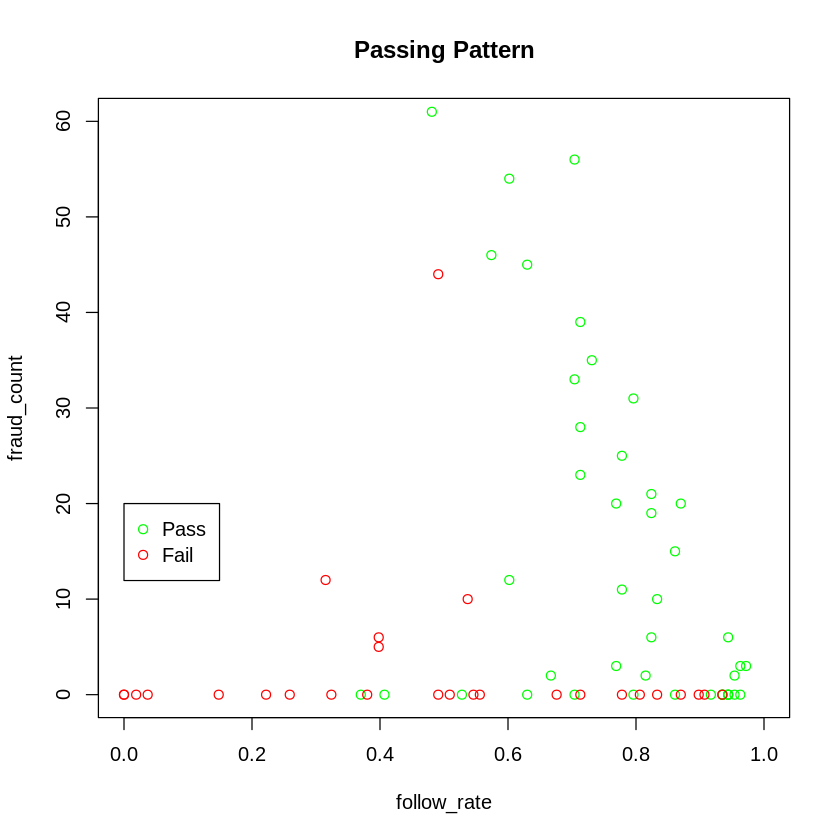

In [2]:
plot(history[history$final_grade>=50, ]$follow_rate,
      history[history$final_grade>=50, ]$fraud_count,
      col = "green", xlim = c(0, 1), ylim = c(0, 60),
      xlab = "follow_rate", ylab = "fraud_count", main = "Passing Pattern")
points(history[history$final_grade<50, ]$follow_rate,
      history[history$final_grade<50, ]$fraud_count,
      col = "red")
legend(0, 20, legend=c("Pass", "Fail"),
       col=c("green", "red"), pch=c(1,1))

It is observed that contrary to expectations, most of those who cheated had higher grades and a better chance of passing. This behavior could be because those who cheat show more sensitivity toward university and grades. As per the second section, we prepare the following function to convert our data into binary form:

In [3]:
history_to_binary = function(history, fraud_threshold) {
    binary_history = data.frame(
      history$follow_rate >= 0.56,
      history$final_grade >= 50,
      history$fraud_count >= fraud_threshold
    )
    colnames(binary_history) <- c("followed", "passed", "fraud")
    return (binary_history)
}

head(history_to_binary(history, 20))

,followed,passed,fraud
,<lgl>,<lgl>,<lgl>
1,FALSE,FALSE,FALSE
2,TRUE,TRUE,FALSE
3,TRUE,FALSE,FALSE
4,FALSE,FALSE,FALSE
5,FALSE,FALSE,FALSE
6,FALSE,FALSE,FALSE


Now, we need to develop the logic of our Bayesian model so that it can work with more than one predictor variable. We do not know how the two predictor variables relate to each other. To simplify, we assume that these two variables are independent, given the response variable. The Bayesian model that benefits from this simplification is called the Naive Bayes Model.
If we assume that our two predictor variables are independent, given the response variable, by naming $X_1$ as the first predictor variable, $X_2$ as the second predictor variable, and $Y$ as the response variable, we can simply write:
$$
X = (X_1, X_2)\\
Bayes' Theorem: P(Y|X) = \frac{P(X|Y)P(Y)}{P(X)} \\
= \frac{P(X1|Y)P(X2|Y)P(Y)}{P(X)}
$$
As mentioned earlier, in Bayesian models, comparisons are important, and we can ignore the denominator, so the term we care about for prediction is:
$$
P(X1|Y)P(X2|Y)P(Y)
$$
Similarly, in Naive Bayesian models, this equation can be extended to any number of predictor variables, assuming the aforementioned conditional independence.

In [4]:
bayes_prediction = function(situation1, situation2, observations, x1, x2, y) {
  P_y = sum(observations[y]) / nrow(observations)
  P_x1_if_y = sum(observations[observations[y]==1,][x1]) /
              sum(observations[y])
  P_x2_if_y = sum(observations[observations[y]==1,][x2]) /
              sum(observations[y])
  P_x1_if_not_y = sum(observations[observations[y] == 0,][x1]) /
                  nrow(observations[observations[y] == 0,])
  P_x2_if_not_y = sum(observations[observations[y] == 0,][x1]) /
                  nrow(observations[observations[y] == 0,])
  if (situation1 == 1 && situation2 == 1) {
    P_true = P_x1_if_y * P_x2_if_y * P_y
    P_false = P_x1_if_not_y * P_x2_if_not_y * (1-P_y)
    return (P_true > P_false)
  } else if (situation1 == 1 && situation2 == 0) {
    P_true = P_x1_if_y * (1-P_x2_if_y) * P_y
    P_false = P_x1_if_not_y * (1-P_x2_if_not_y) * (1-P_y)
    return (P_true > P_false)
  } else if (situation1 == 0 && situation2 == 1) {
    P_true = P_x2_if_y * (1-P_x1_if_y) * P_y
    P_false = P_x2_if_not_y * (1-P_x1_if_not_y) * (1-P_y)
    return (P_true > P_false)
  } else {
    P_true = (1-P_x1_if_y) * (1-P_x2_if_y) * P_y
    P_false = (1-P_x1_if_not_y) * (1-P_x2_if_not_y) * (1-P_y)
    return (P_true > P_false)
  }
}

In [5]:
cat("If someone has more than 56% contribution",
    "and makes frauds more than 50 times,",
    "they probably will pass:",
    bayes_prediction(
      1, 1, history_to_binary(history, 50),
      x1 = "followed", x2 = "fraud", y = "passed"
    )
)

cat("\nIf someone has more than 56% contribution",
    "and makes frauds less than 50 times,",
    "they probably will pass:",
    bayes_prediction(
      1, 0, history_to_binary(history, 50),
      x1 = "followed", x2 = "fraud", y = "passed"
    )
)

If someone has more than 56% contribution and makes frauds more than 50 times, they probably will pass: FALSE
If someone has more than 56% contribution and makes frauds less than 50 times, they probably will pass: TRUE

In the second section, we implemented the efficiency calculation function using a loop, while it was stated in the first section that using a loop is highly inefficient. Therefore, in this section, we will try to rewrite the mentioned function more efficiently using the functions we learned in the third section.

In [6]:
accuracy = function(binary_history) {
    bayes_prediction_over_the_binary_history = function(situation1, situation2){
        return (
            bayes_prediction(
                situation1,
                situation2,
                observations = binary_history,
                x1 = "followed",
                x2 = "fraud",
                y = "passed"
            )
        )
    }
    predictions = mapply(
        bayes_prediction_over_the_binary_history,
        binary_history$followed,
        binary_history$fraud
    )
    matchs_no = sum(predictions == binary_history$passed)
    return (matchs_no/nrow(binary_history))
}

cat("accuracy of threshold = 50 is", accuracy(history_to_binary(history, 50)))

accuracy of threshold = 50 is 0.7887324

In [7]:
accuracy_of_the_model_using_fraud_threshold = function(threshold) {
    return (accuracy(history_to_binary(history, threshold)))
}
accuracies = mapply(accuracy_of_the_model_using_fraud_threshold, seq(0:60)-1)

In [8]:
best_accuracy = max(accuracies)
best_threshold <- which.max(accuracies)-1

cat(
  "The best accuracy is", best_accuracy,
  "corresponding to the fraud threshold", best_threshold
)

The best accuracy is 0.8169014 corresponding to the fraud threshold 0

Thus, we observe that no threshold for the number of cheats could help us predict student pass or fail outcomes. However, this result is not reliable because all of our experiments assumed the 0.56 threshold for participation, which was found without considering the issue of cheating. Therefore, by considering the simultaneous variations of both predictor variables, we might obtain better results. We will examine this.

In [9]:
history_to_binary = function(history, follow_threshold, fraud_threshold) {
    binary_history = data.frame(
      history$follow_rate >= follow_threshold,
      history$final_grade >= 50,
      history$fraud_count >= fraud_threshold
    )
    colnames(binary_history) <- c("followed","passed","fraud")
    return (binary_history)
}

In [10]:
accuracy_of_the_model_using_thresholds = function(follow_threshold, fraud_threshold) {
    return (accuracy(history_to_binary(history, follow_threshold, fraud_threshold)))
}

accuracy_of_the_model_using_threshold_ranges = function(follow_threshold, fraud_threshold ) {
    return (mapply(accuracy_of_the_model_using_thresholds, follow_threshold, fraud_threshold))
}

accuracies = outer(
    (seq(0:100)-1)/100,
    seq(0:60)-1,
    accuracy_of_the_model_using_threshold_ranges
)
# `outer()` is a function to run another function over serries of inputs.

In [11]:
argmax = which(accuracies == max(accuracies), arr.ind=TRUE)[1,]
# `which` returns indexes of True values in a matrix
cat("\nThe best accuracy has been achived in thresholds", (argmax[1]-1)/100,
    "for the follow rate and", (argmax[2]-1), "for the fraud count.",
    "\nThe best accuracy is", accuracies[argmax[1],argmax[2]])


The best accuracy has been achived in thresholds 0.56 for the follow rate and 0 for the fraud count. 
The best accuracy is 0.8169014

Again, we arrived at the same result. This result was expected based on the chart drawn at the beginning of this section. However, be sure to carefully review the path taken. This path contains many details.

# naiveBayes in R
The Naive Bayes model has many applications. As a result, it is prepared in the library below, which we will use from now on. We will demonstrate how to use this library by solving the above problem again:

In [ ]:
install.packages("e1071")
library(e1071)

In [13]:
# It's how you can build a "naiveBayes" model.
# `passed	 ~ followed + fraud` means that the model should
# predict "rainy" column using "cloudy" and "temperature19" predictors.
# `data = history` means that model should use "history" dataframe as it's base
# dataframe.
model <- naiveBayes(passed ~ followed + fraud, data = history_to_binary(history, 0.56, 50))
# using model's name, you can see model detail
model


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
    FALSE      TRUE 
0.3802817 0.6197183 

Conditional probabilities:
       followed
Y            FALSE       TRUE
  FALSE 0.66666667 0.33333333
  TRUE  0.09090909 0.90909091

       fraud
Y            FALSE       TRUE
  FALSE 1.00000000 0.00000000
  TRUE  0.93181818 0.06818182


In [14]:
test = data.frame("followed" = c(T, T, F, F), "fraud" = c(T, F, T, F))
# Just like bellow, you can make your prediction using your model.
# Ignore `type = "raw"` option for now. We will discuss about other types later.
prediction = predict(model, test, type = "raw")
# Output of this function will be corresponding probabilities for each class.
# Each row of the output is corresponding result for each row of prediction
# input (here, `test` dataframe).
prediction

FALSE,TRUE
0.003289146,0.9967109
0.194499018,0.8055010
0.061913696,0.9380863
0.828451883,0.1715481


In [15]:
# Like bellow, we can compute predicted class for each row.
# By answering this question, we can find the logic of this prediction:
# In each row, which column has the greatest probability?
predicted_classes = colnames(prediction)[apply(prediction, 1, which.max)]
# -`apply()` is a function to run another function on each column or row of a
#   datafram. Second input of this function determines that the input function
#   should be applied on each row or column.
# -`apply(prediction,1,which.max)` means: find index of the column with maximum
#   value, for each row of "prediction" dataframe.
# -`colnames()` returns column names of the input dataframe.
# -`colnames(prediction)[indexes]` means: translates `indexes` to corresponding
#   column names.
predicted_classes

[1] "TRUE"  "TRUE"  "TRUE"  "FALSE"

As you saw, the results obtained were the same as those provided by our function. Now that we have learned how to build Naive Bayesian models in R, it would be good to define various scenarios and solve them using this method.

* A problem with more predictor variables;
* A problem with more classes;
* A problem similar to the one solved, but instead of dividing the participation rate into two categories of less than 19 and otherwise, we divide it into three or more categories; for example, participation of less than 17%, more than 60%, and between the two. To solve this problem, it is enough to use a new discrete predictor variable that, instead of two values of zero and one, also takes a third value (like 2). Our function would not accept this variable state, but the introduced library solves this issue as well. It would be good to try to develop the equation used in the model that solves this problem. The logic used is similar to what you have seen so far.

We intend to visually observe the classification of Bayesian models. The code in this part will not be explained.

In [16]:
df = data.frame(row.names = seq(1, 100 * 100))
df["x1"] = rep(seq(100), 100)
df["x2"] = rep(seq(100), each = 100)
# `each=3` means repeat each element 3 times
df["y"] = (df["x2"] / 100) > ((df["x1"] / 100) + 0.1) ^ 3

In [17]:
train_size = floor(0.75 * nrow(df))
set.seed(100)
train_ind = sample(seq_len(nrow(df)), size = train_size)
train = df[train_ind, ]
test = df[-train_ind, ]

In [18]:
model <- naiveBayes(y ~ x1 + x2, data = train)

In [19]:
prediction = predict(model, test, type = "raw")
prediction = as.data.frame(prediction)
prediction["predicted_class"] = prediction["TRUE"] > prediction["FALSE"]
head(prediction)

,FALSE,TRUE,predicted_class
,<dbl>,<dbl>,"<lgl[,1]>"
1,0.0008823338,0.9991177,TRUE
2,0.0021315200,0.9978685,TRUE
3,0.0035618805,0.9964381,TRUE
4,0.0042154203,0.9957846,TRUE
5,0.0069298106,0.9930702,TRUE
6,0.0081554733,0.9918445,TRUE


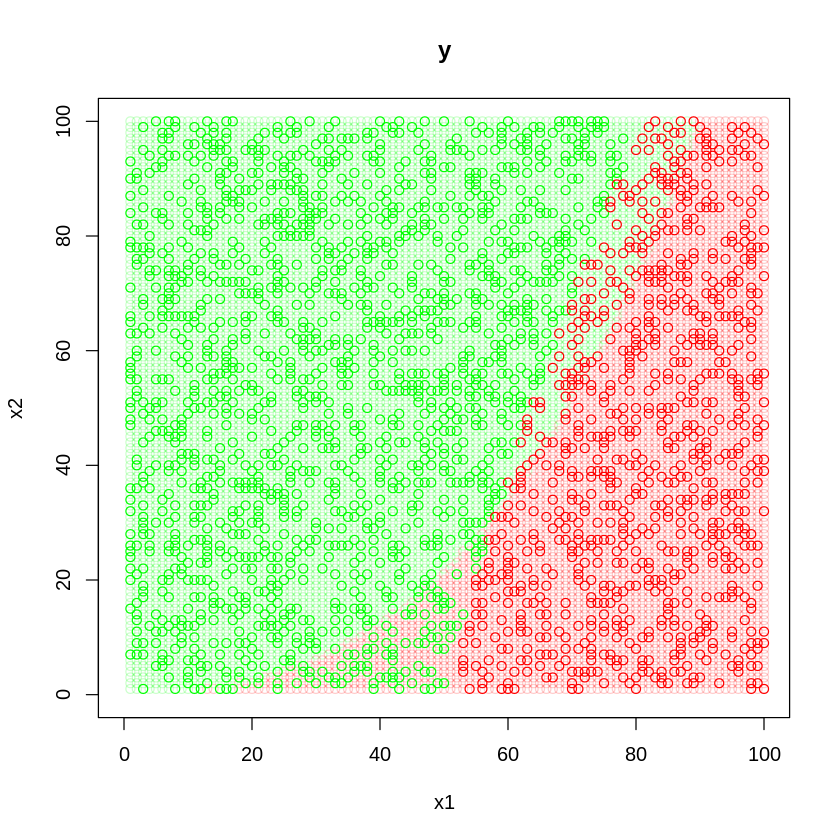

In [20]:
plot(train[train$y, ]$x1, train[train$y, ]$x2,
      col = scales::alpha('green', 0.2), xlim = c(0, 100), ylim = c(0, 100),
      xlab = "x1", ylab = "x2", main = "y")
points(train[!train$y, ]$x1, train[!train$y, ]$x2,
      col = scales::alpha('red', 0.2))
points(test[prediction$predicted_class, ]$x1,
      test[prediction$predicted_class, ]$x2, col = 'green')
points(test[!prediction$predicted_class, ]$x1,
      test[!prediction$predicted_class, ]$x2, col = 'red')

The background colors represent the true class, and the circle colors represent our prediction.